CIFAR10 데이터셋을 이미지 분류 

컴퓨터 비전 분야에서 딥러닝을 통해 

가장 처음에 고안된 방안인

이미지 분류를 진행해보자!

CIFAR 10 데이터셋은 

3*32*32 픽셀의 60000개의 컬러이미지(RGB) 데이터셋이다.

클래스의 개수는 10개이며 

비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭이 있다.

보통 50000개는 훈련, 10000개는 테스트데이터셋으로 구성하는 편이다.

* `torchvision` - base domain library for Pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computuer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transform` - functions for manipulating your vision data (images) to be suitable foruse with an ML model
* `torch.utils.data.Dataset` - Base dataset class for Pytorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
import torch
import torchvision # 컴퓨터 비전에 필요한 패키징

from torchvision import datasets # Image 데이터셋이 있는곳
from torchvision import transforms # 이미지 전처리(Crop, 어파인 변환 이런게 있는거 같던데)
from torch.utils.data import Dataset # 데이터셋 클래스 상속할 때 쓰는 기반클래스
from torch.utils.data import DataLoader # dataset을 iterable할 수 있게하는 Dataloader

import matplotlib.pyplot as plt
# agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print(device) # gpu 사용

c:\Users\hyssk\anaconda3\envs\pytorch_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


In [2]:
# 1. Getting Data (데이터셋 가져오기)

train_dataset=datasets.CIFAR10(root='Data',
                               train=True,
                               transform=transforms.ToTensor(),
                               target_transform=None,
                               download=True)
test_dataset=datasets.CIFAR10(root='Data',
                              train=False,
                              transform=transforms.ToTensor(),
                              target_transform=None,
                              download=True)



Files already downloaded and verified
Files already downloaded and verified


In [3]:
# datasets.CIFAR10를 참조한 train_dataset에 대해 확인하기
print(train_dataset)
print(dir(train_dataset)) # 클래스에 부여된 속성 또는 메소드를 확인할 수 있다. 'class_to_idx', 'classes'
print(len(train_dataset))

print(train_dataset.class_to_idx) # 딕셔너리 형태
print(train_dataset.classes) # 리스트 형태 

print(train_dataset.__getitem__(0)) # 인덱스 0번의 값 출력, 튜플 형태 (텐서정보(3*32*32),클래스넘버) 정보 전달


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: Data
    Split: Train
    StandardTransform
Transform: ToTensor()
['__add__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_integrity', '_format_transform_repr', '_load_meta', '_repr_indent', 'base_folder', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'filename', 'meta', 'root', 'target_transform', 'targets', 'test_list', 'tgz_md5', 'train', 'train_list', 'transform', 'transforms', 'url']
50000
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck':

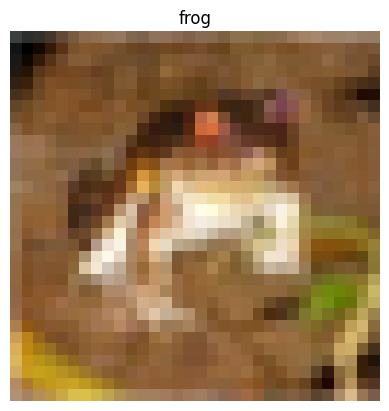

In [4]:
# 데이터셋 추출 후 시각화 해보기

plt.figure()
plt.imshow(train_dataset.__getitem__(0)[0].permute(1,2,0)) # torch의 텐서와 matplotlib의 rgb 순서가 달라서 변환해줘야함.
plt.title(train_dataset.classes[train_dataset.__getitem__(0)[1]])
plt.axis(False)
plt.show()

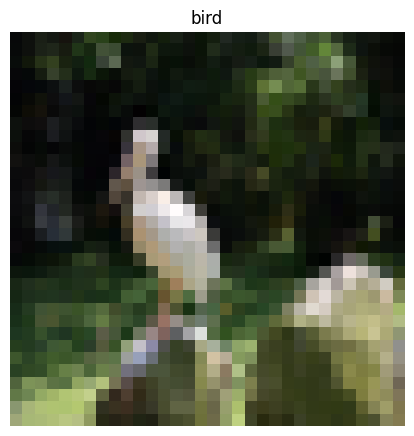

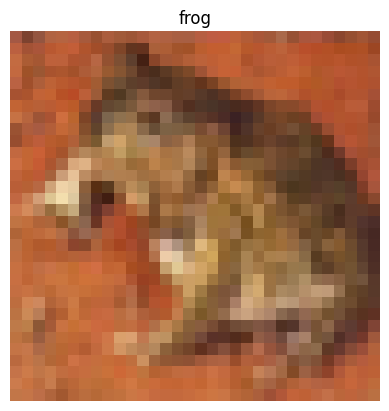

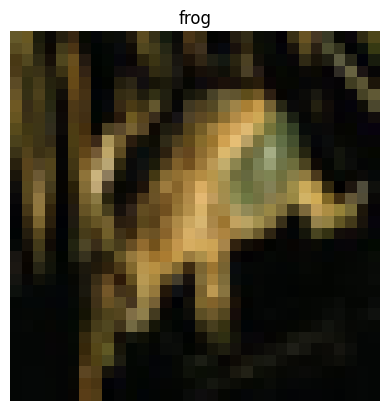

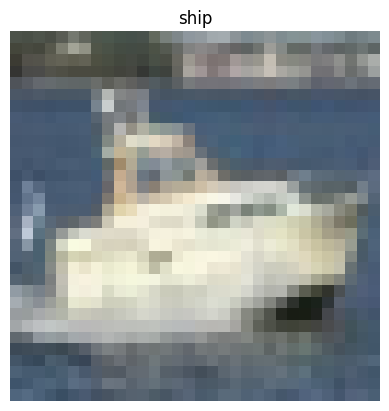

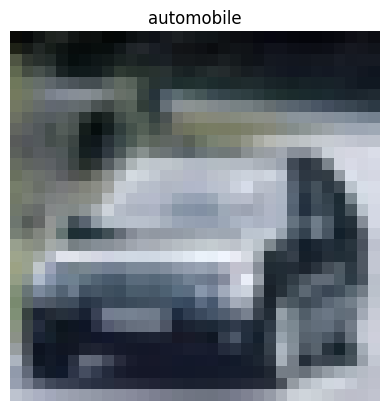

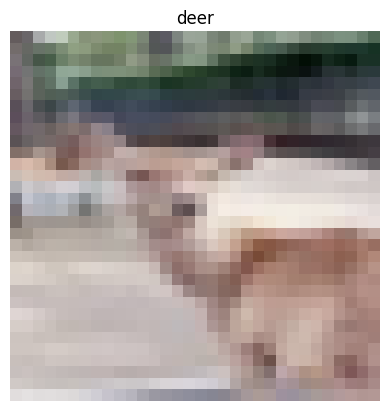

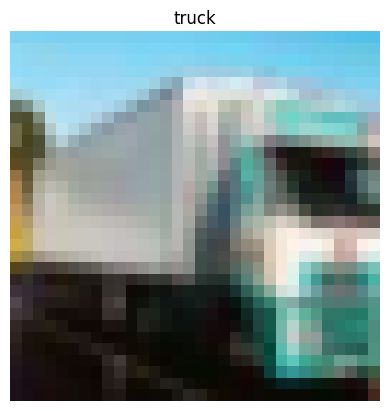

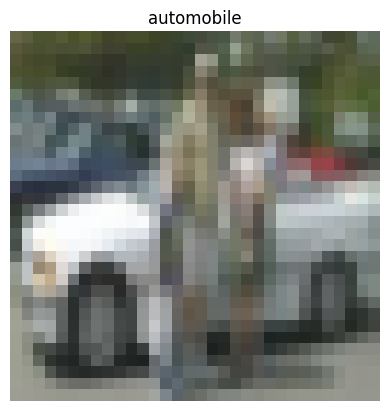

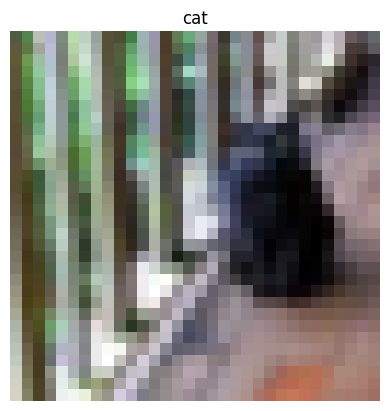

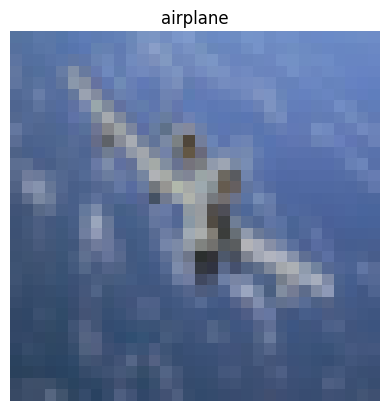

In [5]:
# 랜덤으로 10개 정도 그려보기
import random
fig = plt.figure(figsize=(60,60))
nrows,ncols=1,10

for i in range(1,nrows*ncols+1):
    random_idx = random.randint(a=0, b=len(train_dataset))
    img, idx = train_dataset[random_idx]
    fig.add_subplot(nrows,ncols,i)
    plt.imshow(img.permute(1,2,0))
    plt.axis(False)
    plt.title(train_dataset.classes[idx])
    plt.show()


데이터셋 정보를 iterable한 객체로 만들어서 model에 넣어줘야한다.

DataLoader를 구현해야함

In [6]:
from torch.utils.data import DataLoader
from os import cpu_count
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True
)
test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=BATCH_SIZE,
                             shuffle=False
                             )

print(train_dataloader)
print(len(train_dataloader)) # 1563 (50000//32) shape(32,3,32,32)
print(dir(train_dataloader)) 

train_dataloader_feature,train_dataloader_label=next(iter(train_dataloader))
test_dataloader_feature,test_dataloader_label=next(iter(test_dataloader))
train_dataloader_feature.shape # shape (32,3,32,32) = (batch_size,channel,height,width)


1563
['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_auto_collation', '_dataset_kind', '_get_iterator', '_get_shared_seed', '_index_sampler', '_iterator', 'batch_sampler', 'batch_size', 'check_worker_number_rationality', 'collate_fn', 'dataset', 'drop_last', 'generator', 'multiprocessing_context', 'num_workers', 'persistent_workers', 'pin_memory', 'pin_memory_device', 'prefetch_factor', 'sampler', 'timeout', 'worker_init_fn']


torch.Size([32, 3, 32, 32])

train_dataloader_feature와 train_dataloader_label을 알아보자

In [7]:
print(train_dataloader_feature)
print(train_dataloader_feature.shape)
print(len(train_dataloader_feature))

tensor([[[[0.4549, 0.4392, 0.4863,  ..., 0.7490, 0.7451, 0.7569],
          [0.4745, 0.5412, 0.4784,  ..., 0.7451, 0.7412, 0.7490],
          [0.4588, 0.5451, 0.5333,  ..., 0.7451, 0.7412, 0.7529],
          ...,
          [0.2431, 0.2431, 0.1922,  ..., 0.2549, 0.2431, 0.2471],
          [0.2392, 0.2353, 0.2157,  ..., 0.2392, 0.2510, 0.2549],
          [0.2314, 0.2275, 0.2118,  ..., 0.2549, 0.2667, 0.2745]],

         [[0.4588, 0.4588, 0.4275,  ..., 0.8471, 0.8431, 0.8549],
          [0.4588, 0.5412, 0.4235,  ..., 0.8392, 0.8314, 0.8431],
          [0.4314, 0.5333, 0.4824,  ..., 0.8353, 0.8314, 0.8392],
          ...,
          [0.2549, 0.2706, 0.2235,  ..., 0.3137, 0.2902, 0.2863],
          [0.2510, 0.2588, 0.2471,  ..., 0.2941, 0.2980, 0.2941],
          [0.2471, 0.2549, 0.2392,  ..., 0.3020, 0.3098, 0.3216]],

         [[0.4706, 0.4392, 0.3804,  ..., 0.9882, 0.9804, 0.9922],
          [0.4667, 0.5255, 0.3725,  ..., 0.9765, 0.9686, 0.9804],
          [0.4353, 0.5098, 0.4235,  ..., 0

CIFAR10 데이터셋을 학습시킬 Model 만들어야한다.

TinyVGG (이미지 추출기)를 사용해보자

source - https://poloclub.github.io/cnn-explainer/

In [8]:
from torch import nn

class CIFAR10Model(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv1_block = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2_block = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*8*8,
                  out_features=output_shape)
    )
    def forward(self,x):
        x = self.conv1_block(x)
        #print(x.shape)
        x = self.conv2_block(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

model0=CIFAR10Model(input_shape=3,hidden_units=10,output_shape=len(train_dataset.classes)).to(device)
print(model0)

CIFAR10Model(
  (conv1_block): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_block): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)


In [9]:
from torchsummary import summary
summary(model0,input_size=(3,32,32),batch_size=32,device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 10, 32, 32]             280
              ReLU-2           [32, 10, 32, 32]               0
            Conv2d-3           [32, 10, 32, 32]             910
              ReLU-4           [32, 10, 32, 32]               0
         MaxPool2d-5           [32, 10, 16, 16]               0
            Conv2d-6           [32, 10, 16, 16]             910
              ReLU-7           [32, 10, 16, 16]               0
            Conv2d-8           [32, 10, 16, 16]             910
              ReLU-9           [32, 10, 16, 16]               0
        MaxPool2d-10             [32, 10, 8, 8]               0
          Flatten-11                  [32, 640]               0
           Linear-12                   [32, 10]           6,410
Total params: 9,420
Trainable params: 9,420
Non-trainable params: 0
-----------------------------------

모델 생성 뒤엔 Train, Test Loop를 만들어야한다.

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. print out what's happening.
5. Time it all (for fun).

optimizer와 Loss function도 지정!

In [10]:
import torch.optim
from torch.nn import CrossEntropyLoss

loss_fn = CrossEntropyLoss()
optimizer= torch.optim.Adam(params=model0.parameters(),lr=0.1)

In [12]:
from tqdm.auto import tqdm
EPOCHS=10
for epoch in tqdm(range(10)):
    print(f"---Epochs: {epoch}")
    train_loss = 0.0 # epoch마다 train_loss를 더함
    for batch,(X,y) in enumerate(train_dataloader):
        model0.train()
        X,y = X.to(device),y.to(device)
        # Do the forward pass
        y_pred = model0(X)
        # Calculate loss
        loss = loss_fn(y_pred,y)
        train_loss += loss
        # optimizer zero grad
        optimizer.zero_grad()
        # loss backward 모델의 파라미터 기울기를 계산한다.
        loss.backward() 
        # Optimizer step 모델 가중치 갱신
        optimizer.step()
        if batch % 400==0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples") # batch : 1874 len(X):32
            
    train_loss /=len(train_dataloader)
    print(f"train_loss={train_loss}")
    ### Testing
    test_loss,test_acc=0,0
    model0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader: 
            X_test,y_test=X_test.to(device),y_test.to(device)
            test_pred=model0(X_test)
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred,y_test)
            # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
            # Calculate the test acc average per batch
        test_acc/=len(test_dataloader)
        # Print out what's happening
        print(f"\n Train loss:{train_loss:.4f} | Test_loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

  0%|          | 0/10 [00:00<?, ?it/s]

---Epochs: 0
Looked at 0 / 50000 samples
